# Model Evalutaion Techniques

## Train and test on the entire dataset

#### Lets try Knn with K = 10 first

In [51]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

X = iris.data
Y = iris.target

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X,Y)
knn.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
## Looking at the training accuracy, which is our model evaluation metric here 

from sklearn import metrics

print('Accuracy using knn is %f' %metrics.accuracy_score(knn.predict(X),Y))

Accuracy using knn is 0.980000


In [65]:
### let try with different k values 

k_range = range(1,30)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,Y)
    print('Accuracy using knn with k= %s is %f' %(k,metrics.accuracy_score(knn.predict(X),Y)))

Accuracy using knn with k= 1 is 1.000000
Accuracy using knn with k= 2 is 0.980000
Accuracy using knn with k= 3 is 0.960000
Accuracy using knn with k= 4 is 0.960000
Accuracy using knn with k= 5 is 0.966667
Accuracy using knn with k= 6 is 0.973333
Accuracy using knn with k= 7 is 0.973333
Accuracy using knn with k= 8 is 0.980000
Accuracy using knn with k= 9 is 0.980000
Accuracy using knn with k= 10 is 0.980000
Accuracy using knn with k= 11 is 0.973333
Accuracy using knn with k= 12 is 0.980000
Accuracy using knn with k= 13 is 0.980000
Accuracy using knn with k= 14 is 0.980000
Accuracy using knn with k= 15 is 0.986667
Accuracy using knn with k= 16 is 0.986667
Accuracy using knn with k= 17 is 0.980000
Accuracy using knn with k= 18 is 0.973333
Accuracy using knn with k= 19 is 0.980000
Accuracy using knn with k= 20 is 0.980000
Accuracy using knn with k= 21 is 0.980000
Accuracy using knn with k= 22 is 0.980000
Accuracy using knn with k= 23 is 0.980000
Accuracy using knn with k= 24 is 0.973333
A

#### Lets try logistic and DT not

In [56]:
### Decision Tree
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X,Y)
DT.predict(X)

print('Accuracy using DT is %f' %metrics.accuracy_score(DT.predict(X),Y))

### Logistic 

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,Y)
logreg.predict(X)

print('Accuracy using logistic is %f' %metrics.accuracy_score(logreg.predict(X),Y))

Accuracy using DT is 1.000000
Accuracy using logistic is 0.960000


##### 1. Knn with k = 1 is one of the best models we achieved but with a low value of k our model is trying to overfit the data and making our model complex, whihc is not ideal for our prediction.
##### 2. Out of the three models DT is perfomring the best, whihc could be by chance and we dont have an estimation of how these models are perofrming on unseen data. 
##### 3. Overfiting could be a problem (Complex models will over fit the model, example knn with k = 1).

## Train Test Splitting / Validation Set Approach / Test Set Approach

##### 1. Split the data into Training and test samples
##### 2. Train the model using the training set and calculate the tetsing accuracy by the fitting the modle on test data.

##### Advantages - K times faster that Kfold CV, Simple.

In [1]:
# IMporting required data,methods,metric

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [9]:
# Reading the iris Data

iris = load_iris()


X = iris.data
Y = iris.target

In [66]:
### Splitting the data into training and testing data sample

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 5)

In [67]:
# Using KNN Classifier with K = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [68]:
#Checking for Accuacy
print(metrics.accuracy_score(y_pred,Y_test))
print(metrics.confusion_matrix(y_pred,Y_test))

0.966666666667
[[20  0  0]
 [ 0 21  2]
 [ 0  0 17]]


In [69]:
### Lets try the same for differen values of K, to find the best value of K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy using knn with k= %s is %f' %(k,metrics.accuracy_score(y_pred,Y_test)))

Accuracy using knn with k= 1 is 0.966667
Accuracy using knn with k= 2 is 0.916667
Accuracy using knn with k= 3 is 0.983333
Accuracy using knn with k= 4 is 0.966667
Accuracy using knn with k= 5 is 0.966667
Accuracy using knn with k= 6 is 0.966667
Accuracy using knn with k= 7 is 0.983333
Accuracy using knn with k= 8 is 0.983333
Accuracy using knn with k= 9 is 1.000000
Accuracy using knn with k= 10 is 0.983333
Accuracy using knn with k= 11 is 1.000000
Accuracy using knn with k= 12 is 0.983333
Accuracy using knn with k= 13 is 1.000000
Accuracy using knn with k= 14 is 0.983333
Accuracy using knn with k= 15 is 1.000000
Accuracy using knn with k= 16 is 0.966667
Accuracy using knn with k= 17 is 0.983333
Accuracy using knn with k= 18 is 0.966667
Accuracy using knn with k= 19 is 0.966667
Accuracy using knn with k= 20 is 0.950000
Accuracy using knn with k= 21 is 0.966667
Accuracy using knn with k= 22 is 0.966667
Accuracy using knn with k= 23 is 0.966667
Accuracy using knn with k= 24 is 0.966667
A

In [35]:
#### Lets try all these by change the random state varibale 

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_pred,Y_test))
print(metrics.confusion_matrix(y_pred,Y_test))

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 3)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_pred,Y_test))
print(metrics.confusion_matrix(y_pred,Y_test))


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 2)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_pred,Y_test))
print(metrics.confusion_matrix(y_pred,Y_test))

0.947368421053
[[12  0  0]
 [ 0 12  0]
 [ 0  2 12]]
0.947368421053
[[15  0  0]
 [ 0 10  0]
 [ 0  2 11]]
1.0
[[16  0  0]
 [ 0 11  0]
 [ 0  0 11]]


##### If you look at the above results, we are getting different results for different random_state (I.e. for different samples, so train/test split is not always reliable as it can give reults by chance and there is very high chance of the results being inaccurate.

## KFold Cross Validation

##### To get rid of the above problem, the solution we can think of is to try a bunch of train/test splits and avergaing the results produced.. That should be a good idea.. as the probablity of getting close to accurate results is higher in that case.. (as we are avergaing different combinations of results)

##### Advantages - Accurate and efficient usage of data available.

##### Reccomendation - Use K = 10 in Genral, for classification probelm use stratified sampling for creating folds

#### Steps for Kfold CV
##### 1. Split the Data Set into K equal Partitions
##### 2. Use one of the fold as testing set and union of remaining sets as training sets to train your model
##### 3. Calculate Testing accuracy
##### 4. Repeat 2,3 using each of the remaing K-1 Folds as the testing sample and union of the other remaining sampples as training sample.
##### 5. Calculate the Testing accuracy of each case and evaluate average of all the Testing accuracies as the estimate of over-all testing accuracy. 

In [37]:
# Lets try the Kfold CV on the same iris data using 5 folds, I.e. K=10
# Our goal is to select the best tuning parameters

from sklearn.cross_validation import cross_val_score


# Lets try KNN Classifier with K = 5
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,Y,cv=10,scoring = 'accuracy')

print(scores)
print(scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667


In [43]:
#Searching for a optimal value of K

K_Range = range(1,40)
K_Scores = []
for K in K_Range:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn,X,Y,cv=10,scoring = 'accuracy')
    K_Scores = K_Scores+[scores.mean()]
    ## OR ## K_Scores.append(scores.mean())
print(K_Scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.94666666666666666, 0.95333333333333337]


##### The above results suggest that we get optimal cv score at K = 13,18,20 we will go with K = 13 thus decreasing our model complexity
##### as its difficult to visulaize looking at the data, lets try plotting a graph K_Rnage vs K_Scores

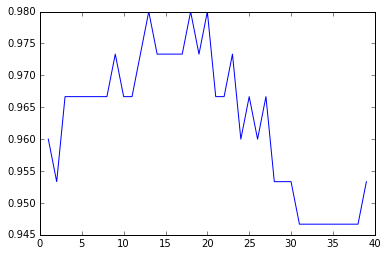

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(K_Range,K_Scores)

### Lets now try comparing differnt models using KFold CV Logestic Reg VS KNN

##### Goal is to compare the best KNN model with logestic model

In [46]:
# Best KNN Model

knn = KNeighborsClassifier(n_neighbors=13)
print('KNN CV Score is %f' %cross_val_score(knn,X,Y,cv = 10,scoring='accuracy').mean())


KNN CV Score is 0.980000


In [73]:
# 10 fold Logistic model

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
print('Logistic CV Score is %f' %cross_val_score(log_reg,X,Y,cv = 10,scoring='accuracy').mean())

Logistic CV Score is 0.953333


In [74]:
for i in range(2,10):
    print('Logistic CV Score for folds = %s is %f' %(i,cross_val_score(log_reg,X,Y,cv = i,scoring='accuracy').mean()))

Logistic CV Score for folds = 2 is 0.946667
Logistic CV Score for folds = 3 is 0.946895
Logistic CV Score for folds = 4 is 0.952457
Logistic CV Score for folds = 5 is 0.960000
Logistic CV Score for folds = 6 is 0.952160
Logistic CV Score for folds = 7 is 0.952381
Logistic CV Score for folds = 8 is 0.958333
Logistic CV Score for folds = 9 is 0.951852


##### IN the above results we can see that the best possible result of logestic is with K= 5 fold cv whihc is still less accurate tha best KNN model, so we can conclude that KNN is better of the two for iris data